# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import json


In [17]:
twt_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [18]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [19]:
#Source for solution 
#https://www.delftstack.com/howto/python-pandas/load-tsv-file-into-a-pandas-dataframe/#:~:text=To%20load%20a%20tsv%20file%20using%20pandas%20dataframe%2C,inside%20the%20method%20read_csv%20%28file_path%2C%20sep%3D%27t%27%29%20as%20arguments.

image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = twt_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [21]:
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [22]:
tweets_data = pd.DataFrame(df_list, columns = ['id', 
                          'retweet_count', 
                          'favorite_count'])
                          

In [23]:
tweets_data.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [24]:
tweets_data.to_csv('tweets_data', index=False)

In [25]:
tweets =  pd.read_csv('tweets_data')


In [26]:
tweets.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 1. Assesing data from Tweet archive enhanced data

In [27]:
twt_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [28]:
twt_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [29]:
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [30]:
twt_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
1217,714962719905021952,NaN,NaN,2016-03-29 23:49:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Just in case anyone's having a bad day. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/inVtemLt9tE,12,10,None,None,None,None,None
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
2258,667724302356258817,NaN,NaN,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,None,None,None
1405,699323444782047232,NaN,NaN,2016-02-15 20:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I'm bathing the children what do you want?"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699323444...,10,10,None,None,None,None,None


In [31]:
twt_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
twt_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [33]:
twt_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Toby           7
Buddy          7
an             7
Bailey         7
Jax            6
Dave           6
Koda           6
Rusty          6
Scout          6
Oscar          6
Milo           6
Bella          6
Stanley        6
Leo            6
Jack           6
very           5
            ... 
Craig          1
Marvin         1
Tommy          1
Vixen          1
Blipson        1
Chaz           1
Jay            1
Bodie          1
Mark           1
all            1
Yukon          1
this           1
Callie         1
Opie           1
Brutus         1
Trip           1
Erik           1
Tino           1
Obie           1
Andru          1
Mimosa         1
O              1
Mauve          1
Bonaparte      1
Augie          1
Damon          1
his            1
Karll         

### 2 Assessing Image prediction data gathered through URL

In [34]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
1583,796865951799083009,https://pbs.twimg.com/media/Cw8JWZ2UsAAJOZ6.jpg,1,Cardigan,0.839129,True,Boston_bull,0.080699,True,Pembroke,0.034505,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,1,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True
819,692905862751522816,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,1,Mexican_hairless,0.162638,True,Doberman,0.156287,True,Rhodesian_ridgeback,0.081478,True


### 3 Assessing tweets data gathered from twitter API

In [38]:
tweets_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [39]:
tweets_data.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [40]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [41]:
#source : https://stackoverflow.com/questions/45938227/random-blocks-of-data-in-pandas

tweets_data.sample(5)

,id,retweet_count,favorite_count
497,813130366689148928,513,4968
1590,686394059078897668,769,1928
1395,699779630832685056,1397,3039
2176,669015743032369152,403,785
597,798686750113755136,2702,0


In [42]:
tweets_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

1. tweet_id column of twitter api has 'id' instead of 'tweet_id'

2. drop initial columns for dog categories Doggo, floffer, pupper, puppo as they can merged into one column

3. Timestamp is string instead of datatime data type 

4. Dog names recorded as a,an,the, none 

5. p1 names start are not consistent some start with Capital letters and other with small letters

6. p2 names start are not consistent some start with Capital letters and other with small letters

7. p3 names start are not consistent some start with Capital letters and other with small letters

8. check and keep tweets with no retweet_status_id and remove all columns related to retweets


### Tidiness issues
1. Dog stages(Doggo, floffer, pupper, puppo) are divided into 4 different columns, all the for columns should be in a single column and the prexisting columns should be dropped

2. Merge all the gathered 3 datasets since they mostly have the same columns, after merging drop the unneeded columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [49]:
# Make copies of original pieces of data
clean_archive = twt_archive.copy()
clean_prediction = image_pred.copy()
clean_tweets_data = tweets_data.copy()


### Issue: Quality 1

#### Define:
tweet_id column of twitter api has 'id' instead of 'tweet_id'
we need to make it uniform before we can merge our datasets


#### Code

In [50]:
clean_tweets_data = clean_tweets_data.rename(columns = {'id' : 'tweet_id'})

#### Test

In [51]:
clean_tweets_data.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Issue: Tidiness 1


#### Define
Dog categories(Doggo, floffer, pupper, puppo) are divided into 4 different columns, all the four columns should be in a single column


#### Code

In [159]:
#create a new column name for dog categories/stages
clean_archive['dog_category'] = clean_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [53]:
clean_archive.dog_category.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_category, dtype: int64

### Issue: Quality 2 

#### Define
drop initial columns for dog categories Doggo, floffer, pupper, puppo from the
clean_archive dataframe 

 #### Code

In [162]:
#drop prexisting dog categories/stages 
clean_archive = clean_archive.drop(columns = ['pupper', 'doggo', 'puppo', 'floofer'])

#### Test

In [55]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_category                  399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Issue: Tidiness 2

#### Define

Merge all the 3 datasets since they mostly have the same columns, after merging drop the unneeded columns

#### Code

In [158]:
#merge cleaned column together by left join
merged_df = pd.merge(clean_archive, clean_prediction, on='tweet_id', how='left')

In [70]:
merged_df = pd.merge(merged_df, clean_tweets_data, on='tweet_id', how='left')

#### Test

In [71]:
merged_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0


### Issue: Quality 3

#### Define

Timestamp is string instead of datatime data type

Change timestamp datatype from string to datetime


#### Code

In [157]:
#convert timestamp to datetime datatype
merged_df.timestamp = pd.to_datetime(merged_df.timestamp)

#### Test

In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_category                  399 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                 

### Issue: Quality 4

#### Define

Dog names recorded as a,an,the, none
extract name fro the name column and replace other inconsistent names with nan

#### Code

In [74]:
#applying regex to convert names in name clumns
merged_df.name = merged_df.name.replace(regex=['^[a-z]+', 'None'], value=np.nan)



In [75]:
#Creating a function to extract names from text column and return NaN if there
#is no named word

def function(text):
    text_list = text.split()
    for word in text_list:
        if word.lower() == 'named':
            name_index = text_list.index(word) + 1
            return text_list[named_index]
        else:
            pass
        return np.nan

In [76]:
#using npwhere to set conditions for true and false
merged_df.name = np.where(merged_df.name.isnull(), merged_df.text.apply(function), merged_df.name)

#### Test

In [77]:
#adding names in place of null values
sum(merged_df.name.isnull())

854

### Issue: Quality 5

#### Define

p1 names start are not consistent some start with Capital letters and other with small letters

Convert all the names to upper cases


#### code

In [156]:
#capitalize the the start of each names in p1
p1_capitalize = merged_df.p1.str.title()

#### Test

In [118]:
p1_capitalize.head()

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper_Towel
4         Basset
Name: p1, dtype: object

### Issue: Quality 6

#### Define

p2 names are not consistent some start with Capital letters and other with small letters

Convert all the names to upper cases

### Code

In [155]:
#capitalize the the start of each names in p2
p2_capitalize = merged_df.p2.str.title()

#### Test

In [119]:
p2_capitalize.head()

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador_Retriever
4      English_Springer
Name: p2, dtype: object

### Issue: Quality 7

#### Define

p3 names are not consistent some start with Capital letters and other with small letters

Convert all the names to upper cases

#### Code

In [153]:
#capitalize the the start of each names in p3
p3_capitalize = merged_df.p3.str.title()

In [115]:
p3_capitalize.head()

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German_Short-Haired_Pointer
Name: p3, dtype: object

### Issue: Quality 8

#### Define 

check and keep tweets with no retweet_status_id

and remove columns related to retweets_status_id


#### Code

In [125]:
# keep tweets that have no retweet_status_id
clean_archive = clean_archive[clean_archive.retweeted_status_id.isnull()]
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_category                  364 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


In [127]:
#remove columns related to retweet_status_id
clean_archive = clean_archive.drop(columns=[
    'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' 
])

#### test

In [128]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_category             364 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [130]:
merged_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [132]:
df_master= pd.read_csv('twitter_archive_master.csv')

### Insights:
1. Linear relationship retweet count and favorite count

2. In Dog categories pupper has the highest number while floofer has the 
lowest value counts

3. Charlie, oliver, Cooper and lucy are the most popular dog names in the dataset

Relationship between retweet count and favorite count

Text(0,0.5,'Favorite Count')

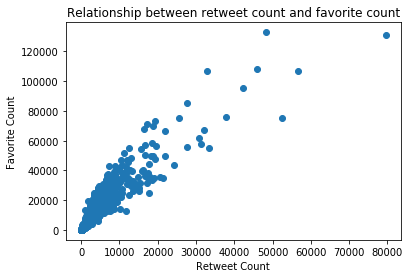

In [135]:
plt.scatter(df_master.retweet_count, df_master.favorite_count)
plt.title('Relationship between retweet count and favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

#### Pupper has the highest number while floofer has the lowest number in the datasets

In [140]:
dog_category = df_master.dog_category.value_counts()
dog_category

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_category, dtype: int64

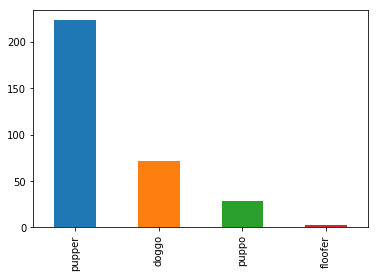

In [146]:
dog_category.plot(kind='bar')

### Charlie, Oliver, Lucy are the most popular names in the datasets

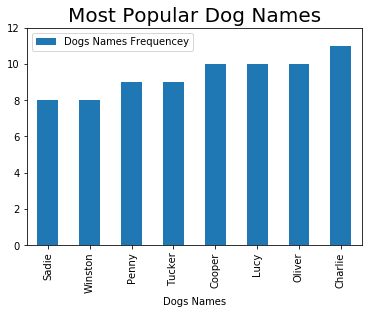

In [152]:
dog_names = df_master.query('name == name')
dog_names_grouped = dog_names.groupby('name').count()[['tweet_id']]
dog_names_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dog_names_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=12)
plt.title("Most Popular Dog Names",{'fontsize': 20})
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequencey"])